In [1]:
!pip install kagglehub[pandas-datasets] --quiet

In [27]:
import pandas as pd
import os
import kagglehub
from kagglehub import KaggleDatasetAdapter
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Machine learning part
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix


#Loading Data

In [4]:
file_path = "Pakistani_Diabetes_Dataset.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mshoaibishaaq/pakistani-diabetes-dataset",
  path=file_path)

print("First 5 records:")
df.head()

<ipython-input-4-68e2c16cb371>:3: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


100%|██████████| 48.7k/48.7k [00:00<00:00, 29.0MB/s]

First 5 records:


,Age,Gender,Rgn,wt,BMI,wst,sys,dia,his,A1c,B.S.R,vision,Exr,dipsia,uria,Dur,neph,HDL,Outcome
0,60.0,1,0,76.0,29.90,41.0,130,90,0,8.90,278,0,30,1,0,5.0,0,60,1
1,57.0,1,1,64.0,24.30,39.0,120,80,1,8.50,165,0,20,1,1,20.0,0,42,1
2,58.0,0,0,73.0,25.20,34.0,140,90,0,5.65,130,1,20,0,0,0.0,0,54,0
3,27.0,0,1,60.0,22.01,30.0,110,70,0,5.00,95,0,15,0,0,0.0,0,57,0
4,56.0,1,0,70.0,25.80,43.0,125,90,0,8.30,139,1,40,1,0,5.0,1,53,1


In [5]:
# Check Data Size
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (912, 19)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      912 non-null    float64
 1   Gender   912 non-null    int64  
 2   Rgn      912 non-null    int64  
 3   wt       912 non-null    float64
 4   BMI      912 non-null    float64
 5   wst      912 non-null    float64
 6   sys      912 non-null    int64  
 7   dia      912 non-null    int64  
 8   his      912 non-null    int64  
 9   A1c      912 non-null    float64
 10  B.S.R    912 non-null    int64  
 11  vision   912 non-null    int64  
 12  Exr      912 non-null    int64  
 13  dipsia   912 non-null    int64  
 14  uria     912 non-null    int64  
 15  Dur      912 non-null    float64
 16  neph     912 non-null    int64  
 17  HDL      912 non-null    int64  
 18  Outcome  912 non-null    int64  
dtypes: float64(6), int64(13)
memory usage: 135.5 KB


In [7]:
# Describe Numeric Features
df.describe()

,Age,Gender,Rgn,wt,BMI,wst,sys,dia,his,A1c,B.S.R,vision,Exr,dipsia,uria,Dur,neph,HDL,Outcome
count,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000
mean,36.318531,0.551535,0.289474,69.363158,25.628164,35.463268,129.642544,82.347588,0.585526,6.859923,165.471491,0.489035,14.429825,0.379386,0.327851,2.112939,0.171053,45.960526,0.532895
std,13.521001,0.497610,0.453767,12.170322,8.247651,3.894227,19.760794,11.831177,0.492901,2.196497,84.727090,0.500154,15.601849,0.485500,0.469688,2.964896,0.376762,6.807417,0.499191
min,12.000000,0.000000,0.000000,30.000000,2.840000,24.000000,90.000000,20.000000,0.000000,0.100000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000
25%,22.750000,0.000000,0.000000,60.000000,22.500000,32.500000,120.000000,73.000000,0.000000,5.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000,0.000000
50%,36.000000,1.000000,0.000000,69.000000,25.235000,35.000000,126.000000,80.000000,1.000000,6.100000,130.500000,0.000000,15.000000,0.000000,0.000000,1.000000,0.000000,46.000000,1.000000
75%,48.000000,1.000000,1.000000,77.000000,28.300000,38.000000,138.000000,90.000000,1.000000,8.500000,217.250000,1.000000,25.000000,1.000000,1.000000,3.500000,0.000000,51.000000,1.000000
max,70.000000,1.000000,1.000000,110.000000,233.790000,67.000000,245.000000,115.000000,1.000000,14.000000,464.000000,1.000000,120.000000,1.000000,1.000000,25.000000,1.000000,62.000000,1.000000


#Feature Engineering

In [8]:
#Check If there is null values
print("Number of Null Values")
print(df.isnull().sum())

Number of Null Values
Age        0
Gender     0
Rgn        0
wt         0
BMI        0
wst        0
sys        0
dia        0
his        0
A1c        0
B.S.R      0
vision     0
Exr        0
dipsia     0
uria       0
Dur        0
neph       0
HDL        0
Outcome    0
dtype: int64


In [9]:
# Drop nan values
df = df.dropna()
print(f"Shape After dropping Null Values {df.shape}")

Shape After dropping Null Values (912, 19)


We do not have any Null/NaN values in our dataset.

In [10]:
duplicates = df.duplicated().sum()
if duplicates > 0:
  df = df.drop_duplicates()

print(f"Duplicates: {duplicates}")

Duplicates: 2


In [11]:
print(f"New Shape after dropping duplicates: {df.shape}")

New Shape after dropping duplicates: (910, 19)


In [12]:
# Renaming Columns for more readability
df.rename(columns={
    'Age': 'Age',
    'Gender': 'Gender',
    'Rgn': 'Region',
    'wt': 'Weight_kg',
    'BMI': 'BMI',
    'wst': 'Waist_inches',
    'sys': 'Systolic_BP',
    'dia': 'Diastolic_BP',
    'his': 'Family_History_Diabetes',
    'A1c': 'Hemoglobin_A1c',
    'B.S.R': 'Blood_Sugar_Random',
    'vision': 'Vision_Impairment',
    'Exr': 'Exercise_Minutes',
    'dipsia': 'Polydipsia',
    'uria': 'Polyuria',
    'Dur': 'Duration_of_Diabetes',
    'neph': 'Nephropathy',
    'HDL': 'HDL_Cholesterol',
    'Outcome': 'Diabetes_Outcome'},
inplace=True)

# Removing any extra whitespace
df.columns = df.columns.str.strip()
print(f"Columns: {list(df.columns)}")

Columns: ['Age', 'Gender', 'Rgn', 'Weight_kg', 'BMI', 'Waist_inches', 'Systolic_BP', 'Diastolic_BP', 'Family_History_Diabetes', 'Hemoglobin_A1c', 'Blood_Sugar_Random', 'Vision_Impairment', 'Exercise_Minutes', 'Polydipsia', 'Polyuria', 'Duration_of_Diabetes', 'Nephropathy', 'HDL_Cholesterol', 'Diabetes_Outcome']


In [13]:
# Data Cleaning by removing unrealistic values

# print the max and min of each column
for column in df.columns:
    print(f"{column}: max: {df[column].max()}, min: {df[column].min()}")

conditions = (
    (df['Age'] >= 0) & (df['Age'] <= 120) &
    (df['Weight_kg'] >= 20) & (df['Weight_kg'] <= 300) &
    (df['BMI'] >= 10) & (df['BMI'] <= 60) &
    (df['Waist_inches'] >= 10) & (df['Waist_inches'] <= 70) &
    (df['Systolic_BP'] >= 70) & (df['Systolic_BP'] <= 250) &
    (df['Diastolic_BP'] >= 40) & (df['Diastolic_BP'] <= 150) &
    (df['Hemoglobin_A1c'] >= 0) & (df['Hemoglobin_A1c'] <= 15)
)

df = df[conditions]
print("-" * 50)
print(f"Size of dataset after removing unrealistic values: {df.shape}")

Age: max: 70.0, min: 12.0
Gender: max: 1, min: 0
Rgn: max: 1, min: 0
Weight_kg: max: 110.0, min: 30.0
BMI: max: 233.79, min: 2.84
Waist_inches: max: 67.0, min: 24.0
Systolic_BP: max: 245, min: 90
Diastolic_BP: max: 115, min: 20
Family_History_Diabetes: max: 1, min: 0
Hemoglobin_A1c: max: 14.0, min: 0.1
Blood_Sugar_Random: max: 464, min: 70
Vision_Impairment: max: 1, min: 0
Exercise_Minutes: max: 120, min: 0
Polydipsia: max: 1, min: 0
Polyuria: max: 1, min: 0
Duration_of_Diabetes: max: 25.0, min: 0.0
Nephropathy: max: 1, min: 0
HDL_Cholesterol: max: 62, min: 30
Diabetes_Outcome: max: 1, min: 0
--------------------------------------------------
Size of dataset after removing unrealistic values: (905, 19)


In [14]:
# To Check if its balanced.
df['Diabetes_Outcome'].value_counts()

,count
Diabetes_Outcome,
1,486
0,419


In [24]:
# Normalize/ Encode variables
from sklearn.preprocessing import StandardScaler, LabelEncoder

categorical_cols = ['Gender', 'Rgn', 'Family_History_Diabetes',
                    'Vision_Impairment', 'Polydipsia',
                    'Polyuria', 'Nephropathy']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

numerical_cols = ['Age', 'Weight_kg', 'BMI', 'Waist_inches',
                  'Systolic_BP', 'Diastolic_BP', 'Hemoglobin_A1c',
                  'Blood_Sugar_Random', 'Exercise_Minutes',
                  'Duration_of_Diabetes', 'HDL_Cholesterol']

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [25]:
# Trian Test split
from sklearn.model_selection import train_test_split

X = df.drop('Diabetes_Outcome', axis=1)
y = df['Diabetes_Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [28]:
model = LogisticRegressionCV(
    Cs=10,
    cv=5,
    penalty='l2',
    solver='liblinear',
    scoring='f1',
    class_weight='balanced',
    random_state=42,
    max_iter=1000
)

model.fit(X_train, y_train)

LogisticRegressionCV(class_weight='balanced', cv=5, max_iter=1000,
                     random_state=42, scoring='f1', solver='liblinear')

In [31]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Best C found through CV:", model.C_)
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


Best C found through CV: [2.7825594]
ROC AUC Score: 1.0


Confusion Matrix:



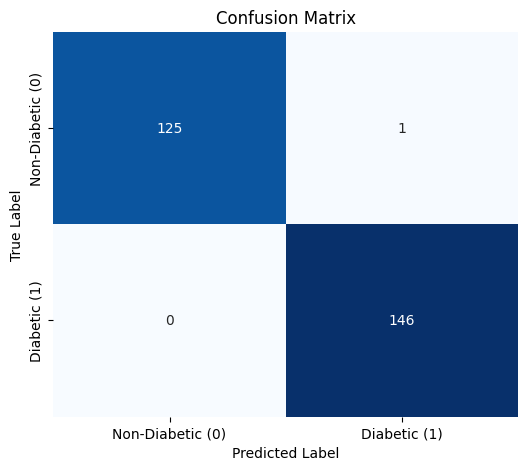

In [32]:
print("Confusion Matrix:\n")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Diabetic (0)', 'Diabetic (1)'],
            yticklabels=['Non-Diabetic (0)', 'Diabetic (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Classification Report:



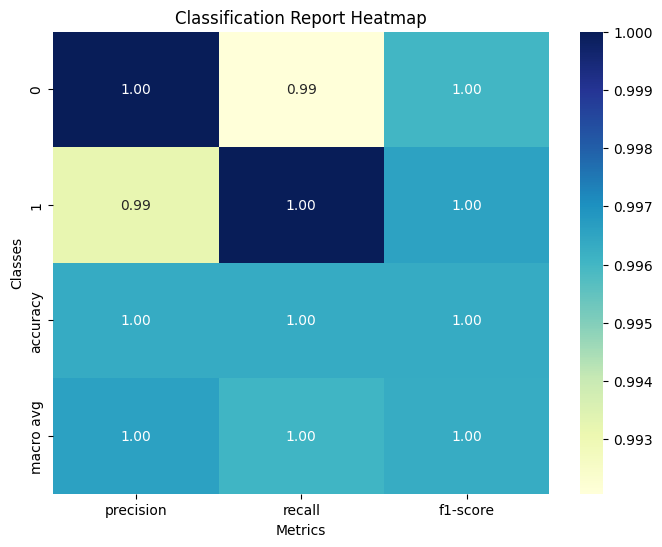

In [33]:
print("Classification Report:\n")
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Classification Report Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()